In [1]:
import torch
from torch import nn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Data Preparing and loading

In [3]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim =1)
y = weight * X + bias

In [4]:
X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [ ]:
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [ ]:
# Splitting data into training and testing sets

In [5]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]

In [6]:
len(X_train), len(X_test)

(40, 10)

In [7]:
# Building a function to visualize our data

In [8]:
def plot(train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None):

  plt.figure(figsize = (10,7))
  plt.scatter(train_data, train_labels, c = "b", label = 'Training data')
  plt.scatter(test_data, test_labels, c = "r", label = 'Testing data')
  plt.legend(prop = {
      "size":14
  })

  if predictions is not None:
    plt.scatter(test_data, predictions, c = 'g', label = "Predictions")



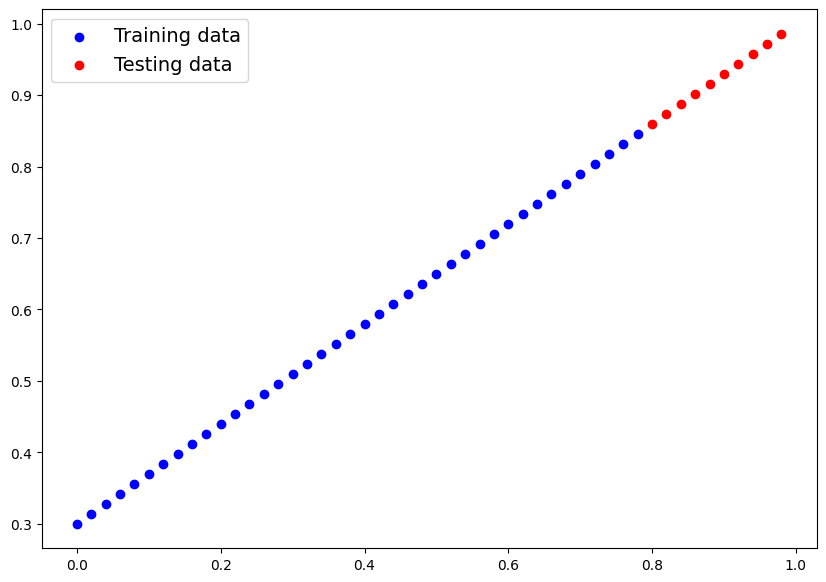

In [9]:
plot()

In [10]:
# Creating our first pytorch model

In [11]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [12]:
# Create a random seed

In [13]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

# Check parameters of our model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [17]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [18]:

# Setup Loss function and optimizer

loss_fn = nn.L1Loss()

In [19]:
loss_fn

L1Loss()

In [20]:
optimizer_fn = torch.optim.SGD(params = model_0.parameters(),
                               lr = 0.01,
                               )

In [21]:
# Building a training loop

In [57]:
torch.manual_seed(42)


epochs=100

epochs_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):

  model_0.train()

  y_pred = model_0(X_train)

  # Calculate Loss

  loss = loss_fn(y_pred, y_train)
  # print(loss)

  # Optimizer zero grad

  optimizer_fn.zero_grad()

  # Perform back propgation

  loss.backward()

  # Perform Gradient descent

  optimizer_fn.step()



  model_0.eval()

  with torch.inference_mode():

    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epochs_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epooch: {epoch} | loss: {loss} | Test Loss: {test_loss}")

    print(model_0.state_dict())




Epooch: 0 | loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epooch: 10 | loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epooch: 20 | loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epooch: 30 | loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epooch: 40 | loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epooch: 50 | loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epooch: 60 | loss: 0.008932482451200485 | Test Loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), (

In [58]:

model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [59]:
weight, bias

(0.7, 0.3)

In [60]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


In [61]:

y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

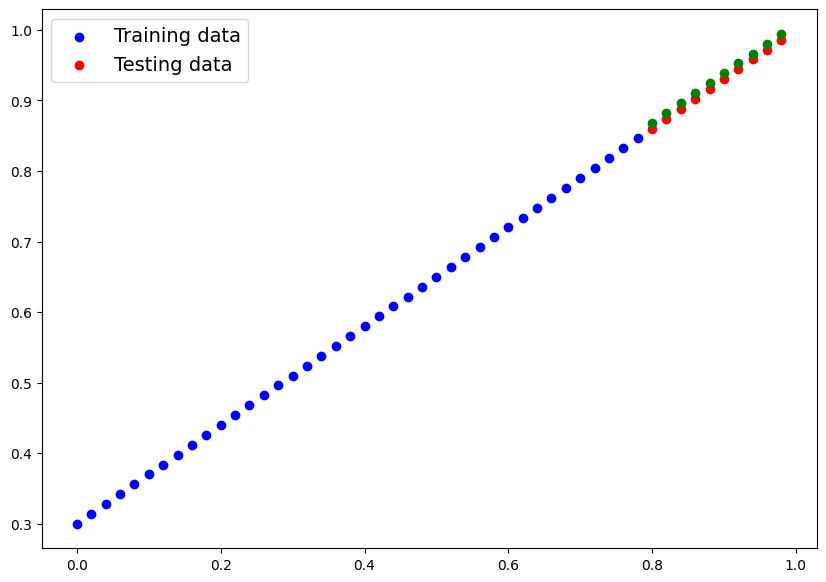

In [62]:
plot(predictions = y_preds_new)

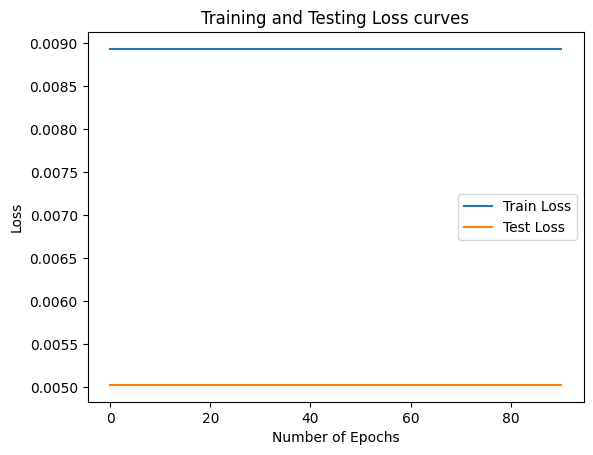

In [63]:
# Plot Loss curvess

plt.plot(epochs_count,np.array(torch.tensor(loss_values).numpy()), label = "Train Loss" )
plt.plot(epochs_count,test_loss_values, label = "Test Loss" )

plt.title("Training and Testing Loss curves")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()


In [64]:
# Save a Pytorch model

In [65]:
from pathlib import Path

Model_path = Path("models")

Model_path.mkdir(parents = True, exist_ok = True)

model_name = "a"
model_save_path = Model_path/model_name

torch.save(obj = model_0.state_dict(),
           f =model_save_path )

In [66]:
!ls -1 models


a


In [39]:
# Loading a pytorch model

In [40]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [41]:
loaded_model_0 = LinearRegressionModel()

# lOAD THE STATE



In [42]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
loaded_model_0.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [44]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [45]:
# Make some predictions

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds



tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [47]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [49]:
y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [68]:
import torch
from torch import nn
from matplotlib import pyplot as plt

In [69]:
torch.__version__

'2.1.0+cu121'

In [70]:
# Create a device agnostic code

In [71]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device is {}".format(device))

Device is cpu
